In [48]:
from fastbook import *

from fastai.vision.all import *


In [14]:
path = Path('./dataset')

In [15]:
brain_tumor_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms()
)

In [16]:
dls = brain_tumor_data.dataloaders(path, bs=64)

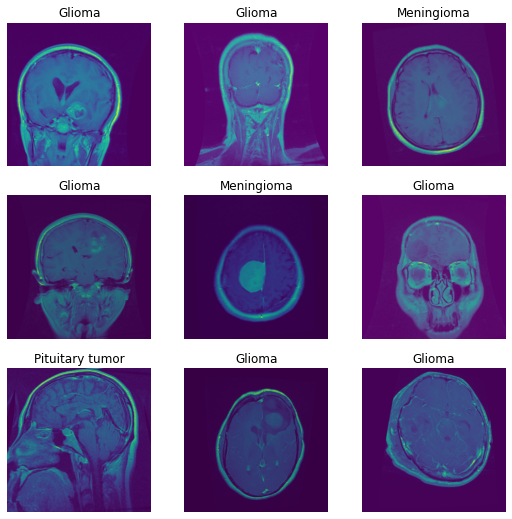

In [17]:
dls.show_batch()

In [6]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(epochs=10)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|█████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [16:00<00:00, 90.9kB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.954243,0.327198,0.867647,30:59


epoch,train_loss,valid_loss,accuracy,time
0,0.452069,0.237818,0.901961,4:23:51
1,0.346173,0.154094,0.939542,41:38
2,0.261587,0.153908,0.947712,9:05:21
3,0.190592,0.113490,0.957516,41:42
4,0.137542,0.077288,0.975490,44:21
5,0.095246,0.080706,0.978758,43:11
6,0.066606,0.069604,0.973856,46:15
7,0.045676,0.059972,0.982026,46:47
8,0.031978,0.061634,0.983660,46:02
9,0.025110,0.059059,0.982026,45:24


In [49]:
learn = load_learner('tumorClassifier.pkl')

AttributeError: Custom classes or functions exported with your `Learner` not available in namespace.\Re-declare/import before loading:
	Can't get attribute 'Resampling' on <module 'PIL.Image' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\PIL\\Image.py'>

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(9)

In [7]:
learn.export('tumorClassifier.pkl')
